In [2]:
import matplotlib.pyplot as plt
import sys
from glob import glob
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import numpy as np
import seaborn as sns
import DNSmodule as dns
from scipy.optimize import curve_fit



params = {'legend.fontsize':'x-large','font.size':10,'axes.labelsize': 'xx-large','xtick.labelsize':'xx-large','ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
#plt.style.use('ggplot')

In [3]:
def resolution_check(f_NH):
    

    ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
    idx_sort = np.argsort(Pms)
    ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
    colors = sns.color_palette('hls',len(f_NH))
    for id_f, f in enumerate(f_NH):
        lu = lus[id_f]
        lb = lbs[id_f]
        Pm = Pms[id_f]
        N = Ns[id_f]
        visc = viscs[id_f]
        kmax = ks[id_f].max()
        time = times[id_f]
        plt.plot(time,kmax*lu,c=colors[id_f],lw=2,label='{} {} {}'.format(N,visc,Pm))
        plt.plot(time,kmax*lb,c=colors[id_f])
        if (True in (kmax * lu < 1.25 )) or (True in (kmax * lb < 1.25 )):
            print(f)
        
    plt.legend(fontsize=8)
    plt.xlim(0.1,5  )
    plt.yscale('log')
    plt.xscale('log')
    plt.ylim(0.5,4)
    plt.show()

/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:696: RuntimeWarning: invalid value encountered in true_divide
  Tu = Lu/U
/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:709: RuntimeWarning: divide by zero encountered in true_divide
  lu = np.power(visc**3/epsu,1/4)


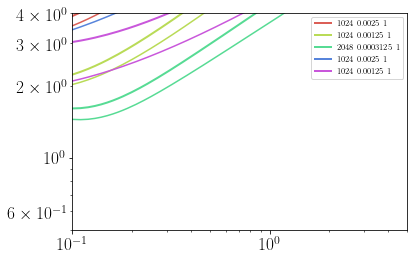

In [5]:
f_NH = glob('ZERO_VEL/Lu/*.b*.spc')
resolution_check(f_NH)

# Fixed Pm = 1, increasing Re 

In [4]:
col_rock = sns.color_palette('rocket',11)[7]
col_mako = sns.color_palette('mako',11)[1]

/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:696: RuntimeWarning: invalid value encountered in true_divide
  Tu = Lu/U
/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:709: RuntimeWarning: divide by zero encountered in true_divide
  lu = np.power(visc**3/epsu,1/4)


nonhelical
Pm = 1 	 p = 1.35 	 q = 0.39
Pm = 1 	 pk = 1.35 	 qk = 0.43
Pm = 1 	 p = 1.78 	 q = 0.41
Pm = 1 	 pk = 1.66 	 qk = 0.43
Pm = 1 	 p = 2.01 	 q = 0.42
Pm = 1 	 pk = 1.94 	 qk = 0.44


/home/andres/miniconda3/envs/std/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


IndexError: list index out of range

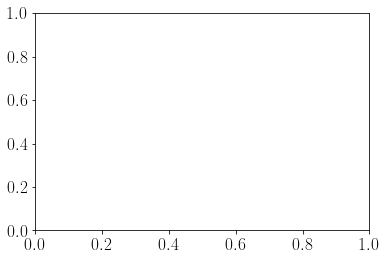

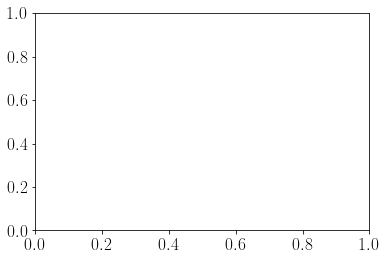

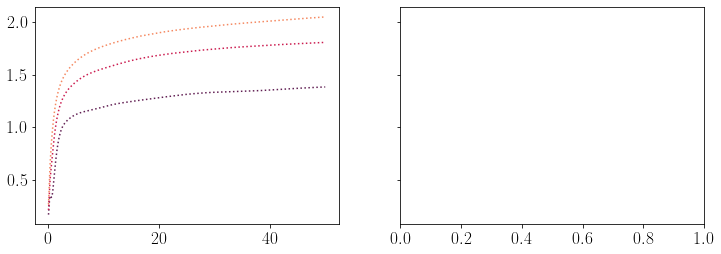

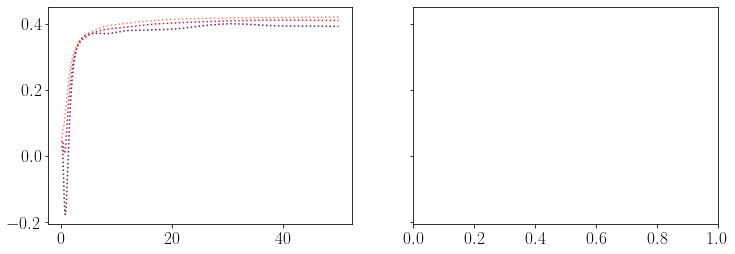

In [6]:
#plt.style.use('ggplot')

figp, axp = plt.subplots()
figq, axq = plt.subplots()
fign, [axn0,axn1] = plt.subplots(1,2,sharey=True,figsize=(12,4))
figl, [axl0,axl1] = plt.subplots(1,2,sharey=True,figsize=(12,4))

ti = 300
tf = -1

f_NH = glob('ZERO_VEL/Re/n*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
pn = []
qn = []
pkn = []
qkn = []

col_NH = sns.color_palette('rocket',len(f_NH))
print('nonhelical')


for idx, f in enumerate(f_NH):

    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]

    time = times[idx]
    nn = - np.gradient(np.log(B[1:]),np.log(time[1:]))
    ln =  np.gradient(np.log(Lb[1:]),np.log(time[1:]))
    E = Es[idx]
    Lu = Lus[idx]
    ls= ':' if Pm ==1 else '-'
    tag = 'nhel' if idx==0 else '__nolegend__'
    axn0.plot(time[1:]/0.1,nn,color=col_NH[idx],ls=ls) 
    axl0.plot(time[1:]/0.1,ln,color=col_NH[idx],ls=ls) 
        
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    pn.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    qn.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(E[ti:tf]), 1)
    pkn.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lu[ti:tf]), 1)
    qkn.append(mq)
    print('Pm = {} \t pk = {:.2f} \t qk = {:.2f}'.format(Pm,-mp,mq))
    

pn = np.array(pn)
qn = np.array(qn)
pkn = np.array(pkn)
qkn = np.array(qkn)

poptNH,pcovNH = curve_fit(dns.fit_complete,Pms[-6:],-pn[-6:])

x_Pms = np.linspace(1/48,48,1000)

#axp.plot(x_Pms, dns.fit_complete(x_Pms,poptNH[0],poptNH[1],poptNH[2]),color=col_rock,ls='--')

axp.plot(Pms, -pn,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_NH[7],label='{:<}    {:>}'.format('$p_b$', 'nhel'))
axq.plot(Pms, qn,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_NH[7],label = '{:<}    {:>}'.format('$q_b$','nhel'))
axp.plot(Pms, -pkn,marker = 'x',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_NH[7],label='{:<}    {:>}'.format('$p_u$', 'nhel'))
axq.plot(Pms, qkn,marker = 'x',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_NH[7],label = '{:<}    {:>}'.format('$q_u$','nhel'))



f_H = glob('ZERO_VEL/Re/h*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)
ph = []
qh = []
pkh = []
qkh = []
col_H = sns.color_palette('mako',len(f_H))
print('helical')
for idx, f in enumerate(f_H):
 
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    
    nh = - np.gradient(np.log(B[1:]),np.log(time[1:]))
    lh =  np.gradient(np.log(Lb[1:]),np.log(time[1:]))
   # tag = 'hel' if idx==7 else '__nolegend__'
    ls = ':' if Pm ==1 else '-'
    axn1.plot(time[1:]/0.1,nh,color=col_H[idx],ls=ls) 
    axl1.plot(time[1:]/0.1,lh,color=col_H[idx],ls=ls)
    E = Es[idx]
    Lu = Lus[idx]
    
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    ph.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    qh.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(E[ti:tf]), 1)
    pkh.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lu[ti:tf]), 1)
    qkh.append(mq)
    print('Pm = {} \t pk = {:.2f} \t qk = {:.2f}'.format(Pm,-mp,mq))

ph = np.array(ph)
qh = np.array(qh)
pkh = np.array(pkh)
qkh = np.array(qkh)

#poptH,pcovH = curve_fit(dns.fit,Pms[-6:],-ph[-6:])
#axp.plot(x_Pms, dns.fit(x_Pms,poptH[0],poptH[1]),color=col_mako,ls='--')


axp.plot(Pms, -ph,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_mako,label='{:<}    {:>}'.format('$p_b$', 'hel'))
axq.plot(Pms, qh,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_mako,label = '{:<}    {:>}'.format('$q_b$','hel'))
axp.plot(Pms, -pkh,marker = '+',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_mako,label='{:<}    {:>}'.format('$p_u$', 'hel'))
axq.plot(Pms, qkh,marker = '+',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_mako,label = '{:<}    {:>}'.format('$q_u$','hel'))


axp.set_xscale('log',basex=2)
axp.set_ylabel('$p$',size = 24)
axp.set_xlabel('$P_m$',size = 24)
axp.legend(fontsize=11,ncol=2)

axp.hlines([1,2/3],1e-4,1e3,linestyles = '--',colors = '0.6')
axp.set_xlim(1/48,48)
axp.set_ylim(0.5,3)
figp.tight_layout()
figp.savefig('p_vs_Pm.pdf',format='pdf')


axq.set_xscale('log',basex=2)
axq.set_ylabel('$q$',size = 24)
axq.set_xlabel('$P_m$',size = 24)
axq.legend(fontsize=11,ncol=2)
axq.hlines(0.5,1e-4,1e3,linestyles = '--',colors = '0.6')
axq.set_xlim(1/48,48)
axq.set_ylim(0.3,0.6)
figq.tight_layout()#
#figq.savefig('q_vs_Pm.pdf',format='pdf')


#axn.set_xscale('',basex=2)
axn0.set_ylabel('$p_b(t)$',size = 36)
axn0.set_xlabel('$t/T$',size = 36)

#axn0.legend(fontsize=11,ncol=2,loc=4)
axn0.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axn0.set_xlim(5e-2,50)
axn0.set_ylim(0,3)
plt.setp(axn0.get_xticklabels(), fontsize=27)
plt.setp(axn0.get_yticklabels(), fontsize=27)
#axn.set_xscale('',basex=2)

#axn1.set_ylabel('n',size = 24)
axn1.set_xlabel('$t/T$',size = 36)
#axn1.legend(fontsize=11,ncol=2)
axn1.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axn1.set_xlim(1e-1,50)
axn1.set_ylim(0,3)
plt.setp(axn1.get_xticklabels(), fontsize=27)
fign.tight_layout()
#fign.savefig('p_vs_t_varying_Pm.pdf', format='pdf')

#axn.set_xscale('',basex=2)
axl0.set_ylabel('$q_b(t)$',size = 36)
axl0.set_xlabel('$t/T$',size = 36)
#axl0.legend(fontsize=11,ncol=2,loc=4)
axl0.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axl0.set_xlim(5e-2,50)
axl0.set_ylim(0.2,0.6)
plt.setp(axl0.get_xticklabels(), fontsize=27)
plt.setp(axl0.get_yticklabels(), fontsize=27)

#axn.set_xscale('',basex=2)

#axn1.set_ylabel('n',size = 24)
axl1.set_xlabel('$t/T$',size = 36)
#axl1.legend(fontsize=11,ncol=2,loc=4)
axl1.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axl1.set_xlim(1e-1,50)
axl1.set_ylim(0.2,0.6)
plt.setp(axl1.get_xticklabels(), fontsize=27)
figl.tight_layout()
#figl.savefig('q_vs_t_varying_Pm.pdf', format='pdf')

plt.show()




/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:696: RuntimeWarning: invalid value encountered in true_divide
  Tu = Lu/U
/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:709: RuntimeWarning: divide by zero encountered in true_divide
  lu = np.power(visc**3/epsu,1/4)


nonhelical
Lu = 129.56 	 p = 1.37 	 q = 0.39
Lu = 129.56 	 pk = 1.34 	 qk = 0.43
Lu = 32.39 	 p = 1.79 	 q = 0.41
Lu = 32.39 	 pk = 1.68 	 qk = 0.43
Lu = 16.20 	 p = 2.03 	 q = 0.42
Lu = 16.20 	 pk = 1.97 	 qk = 0.44


/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:696: RuntimeWarning: invalid value encountered in true_divide
  Tu = Lu/U
/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:709: RuntimeWarning: divide by zero encountered in true_divide
  lu = np.power(visc**3/epsu,1/4)


helical
Lu = 32.39 	 p = 1.05 	 q = 0.45
Lu = 32.39 	 pk = 1.97 	 qk = 0.47
Lu = 16.20 	 p = 1.62 	 q = 0.39
Lu = 16.20 	 pk = 1.97 	 qk = 0.46


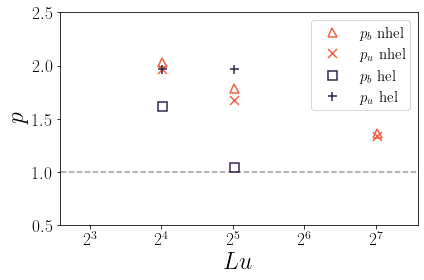

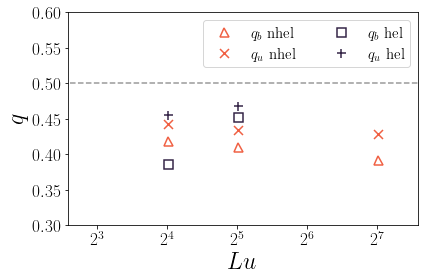

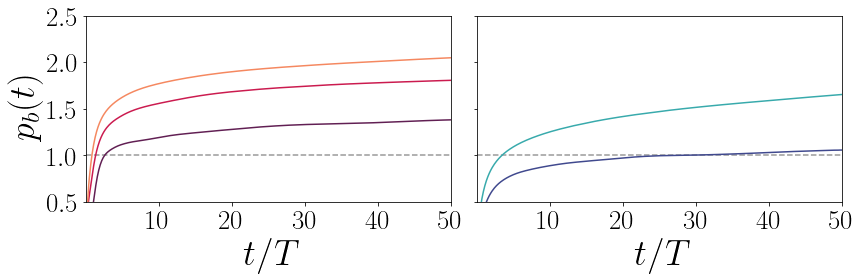

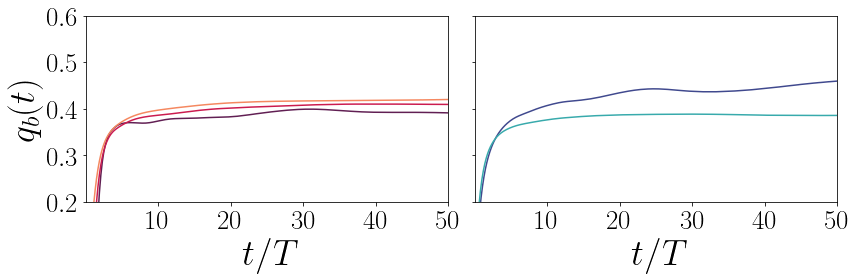

In [7]:
col_mako = sns.color_palette('mako',11)[1]
col_rock = sns.color_palette('rocket',11)[7]
figp, axp = plt.subplots()
figq, axq = plt.subplots()
fign, [axn0,axn1] = plt.subplots(1,2,sharey=True,figsize=(12,4))
figl, [axl0,axl1] = plt.subplots(1,2,sharey=True,figsize=(12,4))

ti = -100
tf = -1

f_NH = glob('ZERO_VEL/Lu/n*.b*.spc')
col_NH = sns.color_palette('rocket',len(f_NH))
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
pn = []
qn = []
pkn = []
qkn = []
Lunds = []

print('nonhelical')
for idx, f in enumerate(f_NH):

    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    visc = viscs[idx]
    U = Us[idx]
    E = Es[idx]
    Lu = Lus[idx] 
    Lund = B[0]*Lb[0]/visc
    Lunds.append(Lund)
    nn = - np.gradient(np.log(B[1:]),np.log(time[1:]))
    nl =   np.gradient(np.log(Lb[1:]),np.log(time[1:]))
    tag = 'nhel' if idx==0 else '__nolegend__'
    axn0.plot(time[1:]/0.1,nn,color=col_NH[idx],label=tag) 
    axl0.plot(time[1:]/0.1,nl,color=col_NH[idx],label=tag) 
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    pn.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    qn.append(mq)
    print('Lu = {:.2f} \t p = {:.2f} \t q = {:.2f}'.format(Lund,-mp,mq))
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(E[ti:tf]), 1)
    pkn.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lu[ti:tf]), 1)
    qkn.append(mq)
    print('Lu = {:.2f} \t pk = {:.2f} \t qk = {:.2f}'.format(Lund,-mp,mq))
    

pn  = np.array(pn)
qn  = np.array(qn)
pkn = np.array(pkn)
qkn = np.array(qkn)

#poptNH,pcovNH = curve_fit(dns.fitm2,Res,-pn)

#poptNH8,pcovNH8 = curve_fit(dns.fitm8,Res,-pn)

x_Res = np.linspace(6,192,1000)
axp.plot(Lunds, -pn,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor =col_rock,label='{:<}    {:>}'.format('$p_b$', 'nhel'))
axq.plot(Lunds, qn,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_rock,label = '{:<}    {:>}'.format('$q_b$','nhel'))
axp.plot(Lunds, -pkn,marker = 'x',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_rock,label='{:<}    {:>}'.format('$p_u$', 'nhel'))
axq.plot(Lunds, qkn,marker = 'x',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_rock,label = '{:<}    {:>}'.format('$q_u$','nhel'))
#axp.plot(x_Res, dns.fitm2(x_Res,poptNH[0],poptNH[1]),color=col_rock,ls='--')
#axp.plot(x_Res, dns.fitm8(x_Res,poptNH8[0],poptNH8[1]),color='g',ls='--')
#axq.plot(x_Res, dns.fitm2(x_Res,LNH[0],LNH[1]),color=col_rock,ls='--')

f_H = glob('ZERO_VEL/Lu/h*.b*.spc')
col_H = sns.color_palette('mako',len(f_H))
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)
ph = []
qh = []
pkh = []
qkh = []
Lunds = []

print('helical')
for idx, f in enumerate(f_H):
 
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    visc = viscs[idx]
    U = Us[idx]
    Lu = Lus[idx] 
    Lund = B[0]*Lb[0]/visc
    Lunds.append(Lund)
    nh = - np.gradient(np.log(B[1:]),np.log(time[1:]))
    hl =  np.gradient(np.log(Lb[1:]),np.log(time[1:]))
    tag = 'nhel' if idx==0 else '__nolegend__'
    axn1.plot(time[1:]/0.1,nh,color=col_H[idx],label=tag)
    axl1.plot(time[1:]/0.1,hl,color=col_H[idx],label=tag)
    
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    ph.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    qh.append(mq)
    print('Lu = {:.2f} \t p = {:.2f} \t q = {:.2f}'.format(Lund,-mp,mq))
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(E[ti:tf]), 1)
    pkh.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lu[ti:tf]), 1)
    qkh.append(mq)
    print('Lu = {:.2f} \t pk = {:.2f} \t qk = {:.2f}'.format(Lund,-mp,mq))
    

ph = np.array(ph)
qh = np.array(qh)
pkh = np.array(pkh)
qkh = np.array(qkh)


#poptH,pcovH = curve_fit(dns.fit,Res,-ph)


axp.plot(Lunds, -ph,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_mako,label='{:<}    {:>}'.format('$p_b$', 'hel'))
axq.plot(Lunds, qh,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_mako,label = '{:<}    {:>}'.format('$q_b$','hel'))
axp.plot(Lunds, -pkh,marker = '+',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_mako,label='{:<}    {:>}'.format('$p_u$', 'hel'))
axq.plot(Lunds, qkh,marker = '+',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_mako,label = '{:<}    {:>}'.format('$q_u$','hel'))
#axp.plot(x_Res, dns.fit(x_Res,poptH[0],poptH[1]),color=col_mako,ls='--')
#axq.plot(x_Res, dns.fit(x_Res,LH[0],LH[1]),color=col_mako,ls='--')

axp.set_xscale('log',basex=2)
axp.set_ylabel('$p$',size = 24)
axp.set_xlabel('$Lu$',size = 24)
axp.legend(fontsize=15)
axp.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axp.set_xlim(6,192)
axp.set_ylim(0.5,2.5)
figp.tight_layout()
#figp.savefig('p_vs_Re_Pm1.pdf',format='pdf')

axq.set_xscale('log',basex=2)
axq.set_ylabel('$q$',size = 24)
axq.set_xlabel('$Lu$',size = 24)
axq.legend(fontsize=15,ncol=2)
axq.hlines(0.5,1e-4,1e3,linestyles = '--',colors = '0.6')
axq.set_xlim(6,192)
axq.set_ylim(0.3,0.6)
figq.tight_layout()
#figq.savefig('q_vs_Re_Pm1.pdf',format='pdf')


#axn.set_xscale('',basex=2)
axn0.set_ylabel('$p_b(t)$',size = 36)
axn0.set_xlabel('$t/T$',size = 36)
#axn0.legend(fontsize=10)
axn0.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axn0.set_xlim(5e-2,50)
axn0.set_ylim(0.6,2.5)
plt.setp(axn0.get_xticklabels(), fontsize=27)
plt.setp(axn0.get_yticklabels(), fontsize=27)


#axn1.set_xscale('',basex=2)
#axn1.set_ylabel('n',size = 24)
axn1.set_xlabel('$t/T$',size = 36)
#axn1.legend(fontsize=10)
axn1.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axn1.set_xlim(5e-2,50)
axn1.set_ylim(0.5,2.5)
fign.tight_layout()

plt.setp(axn1.get_xticklabels(), fontsize=27)
plt.setp(axn1.get_yticklabels(), fontsize=27)



#axn.set_xscale('',basex=2)
axl0.set_ylabel('$q_b(t)$',size = 36)
axl0.set_xlabel('$t/T$',size = 36)
#axl0.legend(fontsize=10)
#axl0.hlines(0.5,1e-4,1e3,linestyles = '--',colors = '0.6')
axl0.set_xlim(5e-2,50)
axl0.set_ylim(0.2,0.6)
plt.setp(axl0.get_xticklabels(), fontsize=27)
plt.setp(axl0.get_yticklabels(), fontsize=27)
#fign.savefig('p_vs_t_varying_Re_Pm1.pdf',format='pdf')


#axl1.set_xscale('',basex=2)
#axl1.set_ylabel('n',size = 24)
axl1.set_xlabel('$t/T$',size = 36)
#axl1.legend(fontsize=10)
#axl1.hlines(0.5,1e-4,1e3,linestyles = '--',colors = '0.6')
axl1.set_xlim(5e-2,50)
axl1.set_ylim(0.2,0.6)
plt.setp(axl1.get_xticklabels(), fontsize=27)
plt.setp(axl1.get_yticklabels(), fontsize=27)


figl.tight_layout()
#figl.savefig('l_vs_t_varying_Re_Pm1.pdf',format='pdf')

#figp.savefig('scalings_comparison_DNS_EDQNM.pdf',format='pdf')
plt.show()







In [5]:
poptNH

array([0.60399686, 2.77770685])

In [74]:
poptH

array([ 0.60218415, 13.89453217])

In [75]:
poptNH

array([1.45278696, 6.60636909])

In [9]:
poptNH8


array([-0.58208739,  3.65722635])

In [16]:
dns.fit_complete(128,0.43,9.60,0.763)

0.6668481660101664

In [6]:
import pandas as pd

In [8]:
Res = []
k_maxs = []
NHs = []
for id_f,f in enumerate(f_NH):
    Res.append(int(Us[idx][0]*Lus[id_f][0]/viscs[id_f]))
    k_maxs.append(ks[id_f][-1])
    NHs.append('NH_{}')


df= pd.DataFrame({'Run':NHs,'$P_m$': Pms,'$\\nu$': viscs,'$Re$': Res,'$k_p$': kps.astype(int), '$N$':Ns})
df = df.round({'$\\nu$': 5,'$Re$': 1,'$P_m$': 5,'$k_p$': 1, '$N$':0})
print(df.to_latex(index = False,escape=False))


\begin{tabular}{lrrrrr}
\toprule
   Run &  $P_m$ &    $\nu$ &  $Re$ &  $k_p$ &   $N$ \\
\midrule
 NH_{} &      1 &  0.00031 &   129 &     40 &  2048 \\
 NH_{} &      1 &  0.00062 &    64 &     40 &  2048 \\
 NH_{} &      1 &  0.00125 &    32 &     40 &  1024 \\
 NH_{} &      1 &  0.00250 &    16 &     40 &  1024 \\
 NH_{} &      1 &  0.00500 &     8 &     40 &  1024 \\
\bottomrule
\end{tabular}



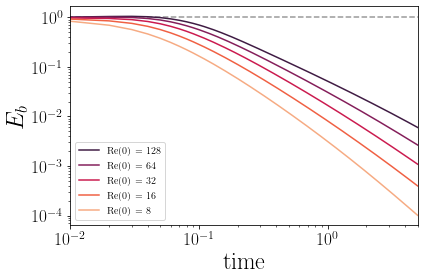

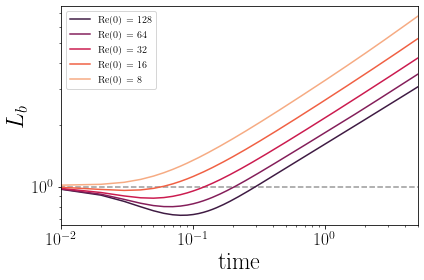

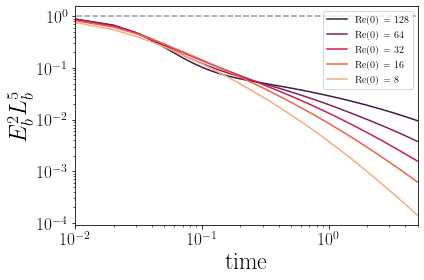

In [73]:
f_NH = glob('increasing_Re/nhel/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)

#plt.style.use('ggplot')

figE, axE = plt.subplots()
figL, axL = plt.subplots()
figH, axH = plt.subplots()
col_NH = sns.color_palette('rocket',len(f_NH))

for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    U = Us[id_f]
    Lu = Lus[id_f]
    visc = viscs[id_f]
    Re = U[0]*Lu[0]/visc
    time = times[id_f]
    Pm = Pms[id_f]
    axE.plot(time, B/B[0], color=col_NH[id_f], label = 'Re(0) = {}'.format(int(Re)))
    axL.plot(time,Lb/Lb[0], color=col_NH[id_f], label = 'Re(0) = {}'.format(int(Re)))
    axH.plot(time,np.power(B,2)*np.power(Lb,5)/(np.power(B,2)[0]*np.power(Lb,5)[0]), color=col_NH[id_f], label = 'Re(0) = {}'.format(int(Re)))




axE.set_xscale('log')
axE.set_yscale('log')
axE.set_ylabel('$E_{b}$',size = 24)
axE.set_xlabel('time',size = 24)
axE.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-2,5)


axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}$',size = 24)
axL.set_xlabel('time',size = 24)
axL.legend(fontsize=10)
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axL.set_xlim(1e-2,5)


axH.set_xscale('log')
axH.set_yscale('log')
axH.set_ylabel('$E_b^2 L^5_{b}$',size = 24)
axH.set_xlabel('time',size = 24)
axH.legend(fontsize=10)
axH.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axH.set_xlim(1e-2,5)

figE.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
figH.tight_layout()

plt.show()



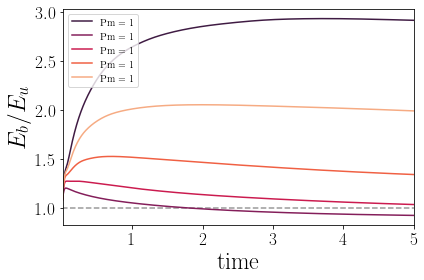

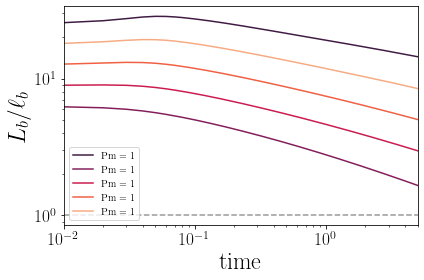

In [47]:
f_NH = glob('increasing_Re/nhel/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)



figE, axE = plt.subplots()
figL, axL = plt.subplots()

col_NH = sns.color_palette('rocket',len(f_NH))

for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    E = Es[id_f]
    Lb   = Lbs[id_f]
    lb = lbs[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    axE.plot(time,B/E, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    axL.plot(time,Lb/lb, color=col_NH[id_f], label = 'Pm = {}'.format(Pm))
    
#axE.set_xscale('log')
#axE.set_yscale('log')
axE.set_ylabel('$E_{b}/E_u$',size = 24)
axE.set_xlabel('time',size = 24)
axL.set_xscale('log')
axL.set_yscale('log')
axL.set_ylabel('$L_{b}/\ell_b$',size = 24)
axL.set_xlabel('time',size = 24)
#axE.legend(fontsize=10)
#axL.legend(fontsize=10)
axE.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axL.hlines(1,1e-4,1e3,linestyles = '--',colors = '0.6')
axE.set_xlim(1e-2,5)
axL.set_xlim(1e-2,5)
figE.tight_layout()
#fig.savefig('Eb_vs_t_DNS.pdf',format='pdf')
figL.tight_layout()
#figL.savefig('Lb_vs_t_DNS.pdf',format='pdf')
plt.show()

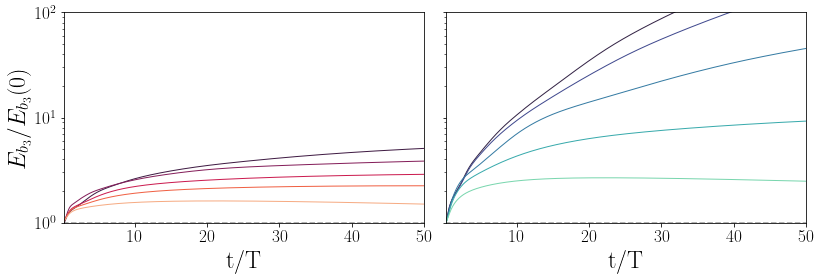

In [71]:
f_H = glob('increasing_Re/hel/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)

#plt.style.use('ggplot')

figE, [axE0,axE1] = plt.subplots(1,2,figsize=(11.5,4),sharey=True)

col_H = sns.color_palette('mako',len(f_H))

for id_f,f in enumerate(f_H):
    B    = Bs[id_f]
    Bk = Bks[id_f]
    T = Tus[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    k = ks[id_f]
    #int(Pm) if Pm.is_integer() else Pm
    B3 = dns.integrate(Bk,0,3,k)
    axE1.plot(time[:-1]/T[0], B3/B3[0], color=col_H[id_f],ls=(':' if Pm==16 else '-'), lw=(3 if Pm==16 else 1),label = 'Pm = {}'.format(Pm))

    
    
    
    
f_NH = glob('increasing_Re/nhel/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
col_NH = sns.color_palette('rocket',len(f_NH))
for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Bk = Bks[id_f]
    T = Tus[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    k = ks[id_f]
    #int(Pm) if Pm.is_integer() else Pm
    B3 = dns.integrate(Bk,0,3,k)
    axE0.plot(time[:-1]/T[0], B3/B3[0], color=col_NH[id_f], ls=(':' if Pm==16 else '-'),lw=(3 if Pm==16 else 1),label = 'Pm = {}'.format(Pm))


#axE.set_xscale('log')
axE0.set_yscale('log')
axE0.set_ylabel('$E_{b_3}/E_{b_3}(0)$',size = 24)
axE0.set_xlabel('t/T',size = 24)
#axE.legend(fontsize=12,ncol=3)
axE0.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axE0.set_xlim(1e-1,50)
axE0.set_ylim(1,1e2)

#axE.set_xscale('log')
axE1.set_yscale('log')
#axE1.set_ylabel('$E_{b_3}/E_{b_3}(0)$',size = 24)
axE1.set_xlabel('t/T',size = 24)
#axE.legend(fontsize=12,ncol=3)
axE1.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axE1.set_xlim(1e-1,50)
axE1.set_ylim(1,1e2)


figE.tight_layout()
figE.savefig('E3_vs_t_increasing_Re.pdf',format='pdf')

plt.show()

/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:696: RuntimeWarning: invalid value encountered in true_divide
  Tu = Lu/U
/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:709: RuntimeWarning: divide by zero encountered in true_divide
  lu = np.power(visc**3/epsu,1/4)


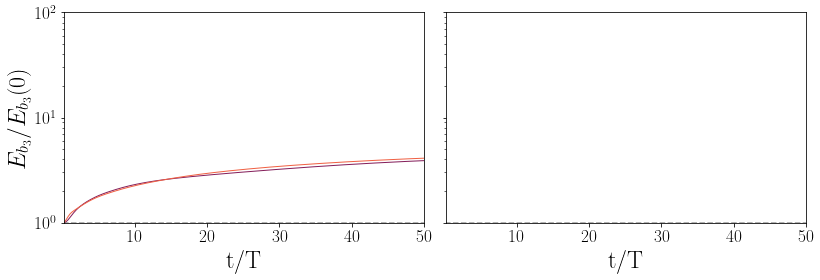

In [15]:

figE, [axE0,axE1] = plt.subplots(1,2,figsize=(11.5,4),sharey=True)


    
    
f_NH = ['ZERO_VEL/Re/nhG_zero_vel.b_2048_0.0003125_1.spc','increasing_Re/nhel/nhG.b_2048_0.0003125_1.spc']
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
col_NH = sns.color_palette('rocket',len(f_NH))
for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Bk = Bks[id_f]
    T = Tbs[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    k = ks[id_f]
    #int(Pm) if Pm.is_integer() else Pm
    B3 = dns.integrate(Bk,0,3,k)
    axE0.plot(time[:-1]/T[0], B3/B3[0], color=col_NH[id_f], ls=(':' if Pm==16 else '-'),lw=(3 if Pm==16 else 1),label = 'Pm = {}'.format(Pm))


#axE.set_xscale('log')
axE0.set_yscale('log')
axE0.set_ylabel('$E_{b_3}/E_{b_3}(0)$',size = 24)
axE0.set_xlabel('t/T',size = 24)
#axE.legend(fontsize=12,ncol=3)
axE0.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axE0.set_xlim(1e-1,50)
axE0.set_ylim(1,1e2)

#axE.set_xscale('log')
axE1.set_yscale('log')
#axE1.set_ylabel('$E_{b_3}/E_{b_3}(0)$',size = 24)
axE1.set_xlabel('t/T',size = 24)
#axE.legend(fontsize=12,ncol=3)
axE1.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axE1.set_xlim(1e-1,50)
axE1.set_ylim(1,1e2)


figE.tight_layout()
#figE.savefig('E3_vs_t_increasing_Re.pdf',format='pdf')

plt.show()

/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:696: RuntimeWarning: invalid value encountered in true_divide
  Tu = Lu/U
/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:709: RuntimeWarning: divide by zero encountered in true_divide
  lu = np.power(visc**3/epsu,1/4)


ZERO_VEL/Re/nhG_zero_vel.b_2048_0.0003125_1.spc
ZERO_VEL/Re/nhE_zero_vel.b_1024_0.00125_1.spc
ZERO_VEL/Re/nhD2_zero_vel.b_1024_0.0025_1.spc


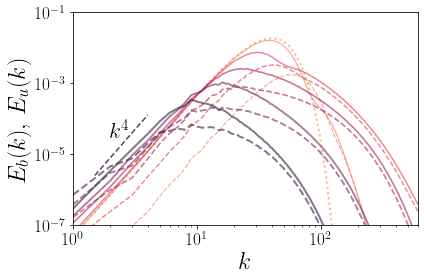

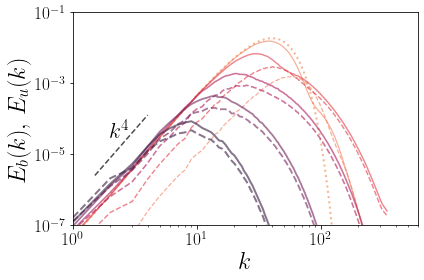

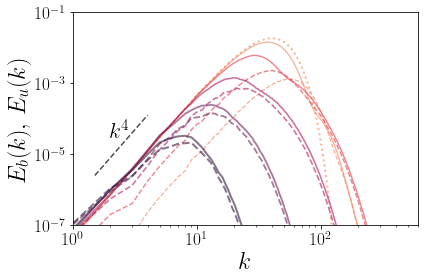

In [11]:
f_NH = glob('ZERO_VEL/Lu/n*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
t = [0,2,8,32,128,499]
lws = np.linspace(1,2,len(t))
#print(lws)
#plt.style.use('ggplot')

col_NH = sns.color_palette('rocket',len(t))
col_NH.reverse()
t_T = []

for idx, f in enumerate(f_NH):
    print(f)

    fig, ax = plt.subplots()
    Bk = Bks[idx]
    Ek = Eks[idx]
    Pm = Pms[idx]
    T = Tus[idx][0]
    t_T.append(t/T)
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    
    U= Us[idx]
    Lu= Lus[idx]
    visc = viscs[idx]
    Re = U[0]*Lu[0]/visc


    for id_t,idx_t in enumerate(t):
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=col_NH[id_t],lw=2,ls=':',label ='__nolegend__')
        else:
            ax.plot(k,Bk[idx_t],c=col_NH[id_t],alpha = 0.6, lw = lws[id_t])
            ax.plot(k,Ek[idx_t],c=col_NH[id_t],alpha = 0.6, ls='--',lw = lws[id_t])
    k_slope = np.array([1.5,4])
    ax.plot(k_slope,5e-7*np.power(k_slope,4),c='0.3',ls='--')
    ax.text(2,3e-5,'$k^{4}$',size=22)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('$E_b(k),\, E_u(k)$',fontsize=24)
    ax.set_xlabel('$k$',fontsize=24)
    ax.set_ylim(1e-7,1e-1)
    ax.set_xlim(1,600)
    #ax.legend(fontsize=7)
    fig.tight_layout()
    #fig.savefig('Eb_nh_{}_inc_Re.pdf'.format(Re),format='pdf')


/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:696: RuntimeWarning: invalid value encountered in true_divide
  Tu = Lu/U
/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:709: RuntimeWarning: divide by zero encountered in true_divide
  lu = np.power(visc**3/epsu,1/4)


ZERO_VEL/Lu/nhG_zero_vel.b_2048_0.0003125_1.spc
0.0
0.21021137422767575
0.840845496910703
3.363381987642812
13.453527950571248
52.447737869805096
increasing_Re/nhel/nhG.b_2048_0.0003125_1.spc
0.0
0.2102011815554881
0.8408047262219523
3.3632189048878094
13.452875619551238
52.44519479809428


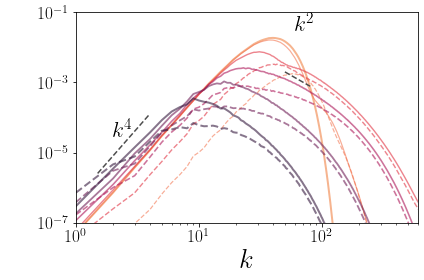

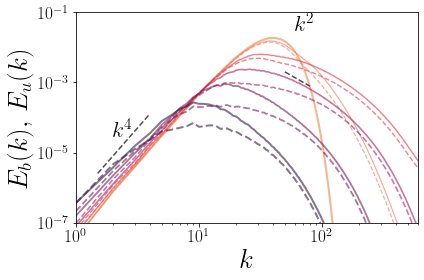

In [12]:
f_NH = ['ZERO_VEL/Lu/nhG_zero_vel.b_2048_0.0003125_1.spc','increasing_Re/nhel/nhG.b_2048_0.0003125_1.spc']
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
t = [0,2,8,32,128,499]
lws = np.linspace(1,2,len(t))
#print(lws)
#plt.style.use('ggplot')

col_NH = sns.color_palette('rocket',len(t))
col_NH.reverse()
t_T = []
labs = ['zero','equi']
for idx, f in enumerate(f_NH):
    print(f)

    fig, ax = plt.subplots()
    Bk = Bks[idx]
    Ek = Eks[idx]
    Pm = Pms[idx]
    T = Tbs[idx][0]
    t_T.append(t/T)
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    
    U= Us[idx]
    Lu= Lus[idx]
    visc = viscs[idx]
    #Re = U[0]*Lu[0]/visc
    lab = labs[idx]

    for id_t,idx_t in enumerate(t):
        print(time[idx_t]/T)
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c=col_NH[id_t],lw=2,ls='-',label ='__nolegend__')
        else:
            ax.plot(k,Bk[idx_t],c=col_NH[id_t],alpha = 0.6, lw = lws[id_t])
            ax.plot(k,Ek[idx_t],c=col_NH[id_t],alpha = 0.6, ls='--',lw = lws[id_t])
    k_slope = np.array([1.5,4])
    ax.plot(k_slope,5e-7*np.power(k_slope,4),c='0.3',ls='--')
    ax.text(2,3e-5,'$k^{4}$',size=22)
    
    #k_slope = np.array([50,80])
    #ax.plot(k_slope,5*(1/np.power(k_slope,2)),c='0.3',ls='--')
    #ax.text(60,3e-2,'$k^{2}$',size=22)
    
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('$E_b(k),\, E_u(k)$',fontsize=27,c='k' if idx==1 else 'w')
    ax.set_xlabel('$k$',fontsize=27)
    ax.set_ylim(1e-7,1e-1)
    ax.set_xlim(1,600)
    #ax.legend(fontsize=7)
    fig.tight_layout()
    #fig.savefig('Eb_nh_{}.pdf'.format(lab),format='pdf')

In [13]:
cols = ['#df1e36','#c9c900','#091f3f']
red  = cols[0]
yel  = cols[1]
blue = cols[2]

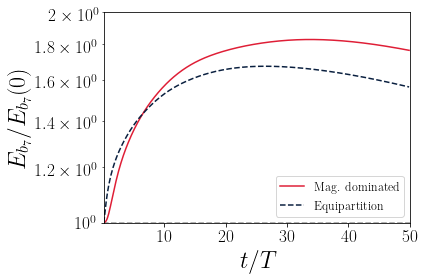

In [16]:

figE, axE0 = plt.subplots()


E_mhd_zero= dns.col_E(f_NH[0])
E_mhd_equi = dns.col_E(f_NH[1])


Ekb_mhd_zero = dns.B_spectrum(f_NH[0])
Ekb_mhd_equi = dns.B_spectrum(f_NH[1])

k2048 = np.arange(1,int(2048/3),1)



t_mhd_zero = dns.col_t(f_NH[0])


t_mhd_equi = dns.col_t(f_NH[1])



E3_mhd_zero = dns.integrate(Ekb_mhd_zero,0,8,k2048)
E3_mhd_equi = dns.integrate(Ekb_mhd_equi,0,8,k2048)


axE0.plot(t_mhd_zero[:-1]/0.1, E3_mhd_zero/E3_mhd_zero[0], color=red,ls='-',label='Mag. dominated')
axE0.plot(t_mhd_equi[:-1]/0.1, E3_mhd_equi/E3_mhd_equi[0], color=blue,ls='--',label='Equipartition')

    
    
#axE.set_xscale('log')
axE0.set_yscale('log')
axE0.set_ylabel('$E_{b_7}/E_{b_7}(0)$',size = 24)
axE0.set_xlabel('$t/T$',size = 24)
axE0.legend(fontsize=12)
axE0.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axE0.set_xlim(1e-1,50)
axE0.set_ylim(1,2)


figE.tight_layout()
figE.savefig('E7_vs_t_comparison_MHD_HD_paper.pdf',format='pdf')

plt.show()

/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:696: RuntimeWarning: invalid value encountered in true_divide
  Tu = Lu/U
/home/andres/MHD_decaying/decaying_mhd_DNS/new_data/DNSmodule.py:709: RuntimeWarning: divide by zero encountered in true_divide
  lu = np.power(visc**3/epsu,1/4)


ZERO_VEL/Lu/nhG_zero_vel.b_2048_0.0003125_1.spc
increasing_Re/nhel/nhG.b_2048_0.0003125_1.spc


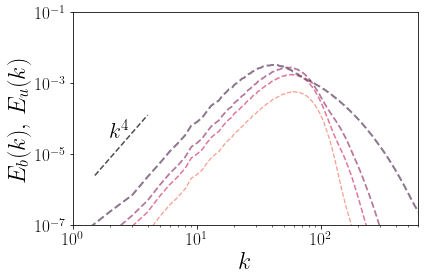

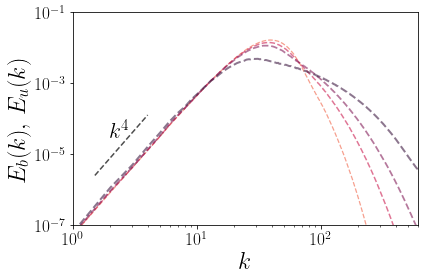

In [22]:
f_NH = ['ZERO_VEL/Lu/nhG_zero_vel.b_2048_0.0003125_1.spc','increasing_Re/nhel/nhG.b_2048_0.0003125_1.spc']
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(viscs)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
t = [0,1,2,3,8]
lws = np.linspace(1,2,len(t))

col_NH = sns.color_palette('rocket',len(t))
col_NH.reverse()
t_T = []

for idx, f in enumerate(f_NH):
    print(f)

    fig, ax = plt.subplots()
    Bk = Bks[idx]
    Ek = Eks[idx]
    Pm = Pms[idx]
    T = Tus[idx][0]
    t_T.append(t/T)
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    
    U= Us[idx]
    Lu= Lus[idx]
    visc = viscs[idx]
    Re = U[0]*Lu[0]/visc


    for id_t,idx_t in enumerate(t):
        if idx_t == 0:
            ax.plot(k,Bk[idx_t],c='w',lw=2,ls=':',label ='__nolegend__')
        else:
            #ax.plot(k,Bk[idx_t],c=col_NH[id_t],alpha = 0.6, lw = lws[id_t])
            ax.plot(k,Ek[idx_t],c=col_NH[id_t],alpha = 0.6, ls='--',lw = lws[id_t])
    k_slope = np.array([1.5,4])
    ax.plot(k_slope,5e-7*np.power(k_slope,4),c='0.3',ls='--')
    ax.text(2,3e-5,'$k^{4}$',size=22)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylabel('$E_b(k),\, E_u(k)$',fontsize=24)
    ax.set_xlabel('$k$',fontsize=24)
    ax.set_ylim(1e-7,1e-1)
    ax.set_xlim(1,600)
    #ax.legend(fontsize=7)
    fig.tight_layout()
    #fig.savefig('Eb_nh_{}_inc_Re.pdf'.format(Re),format='pdf')